                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.7571  0.9249    0.8326  0.9317
1              XGBoost     0.8525  0.9086    0.8796  0.9604
2  Logistic Regression     0.6299  0.7777    0.6960  0.7795
3                  SVM     0.8079  0.8923    0.8480  0.9320


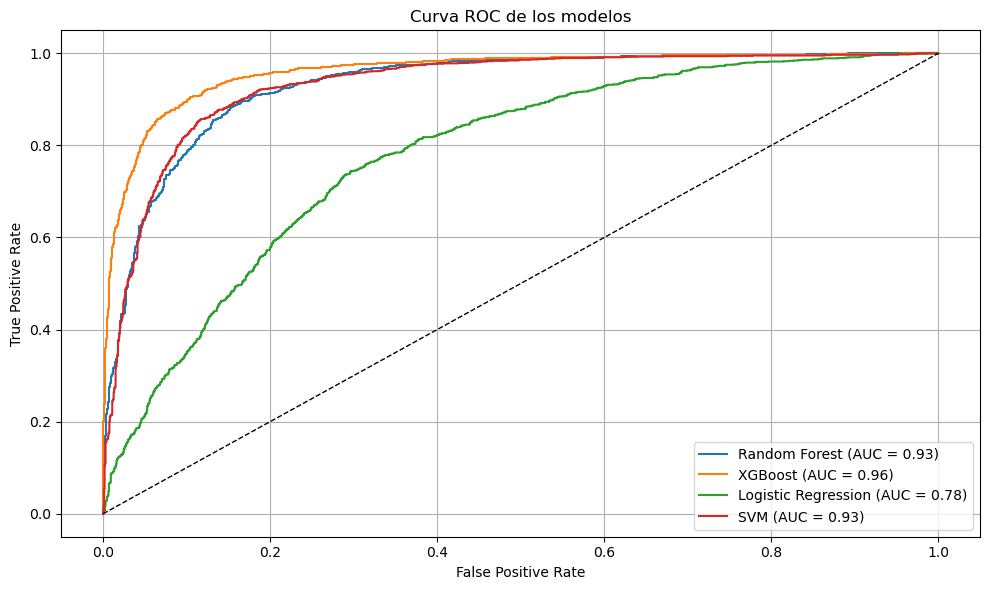

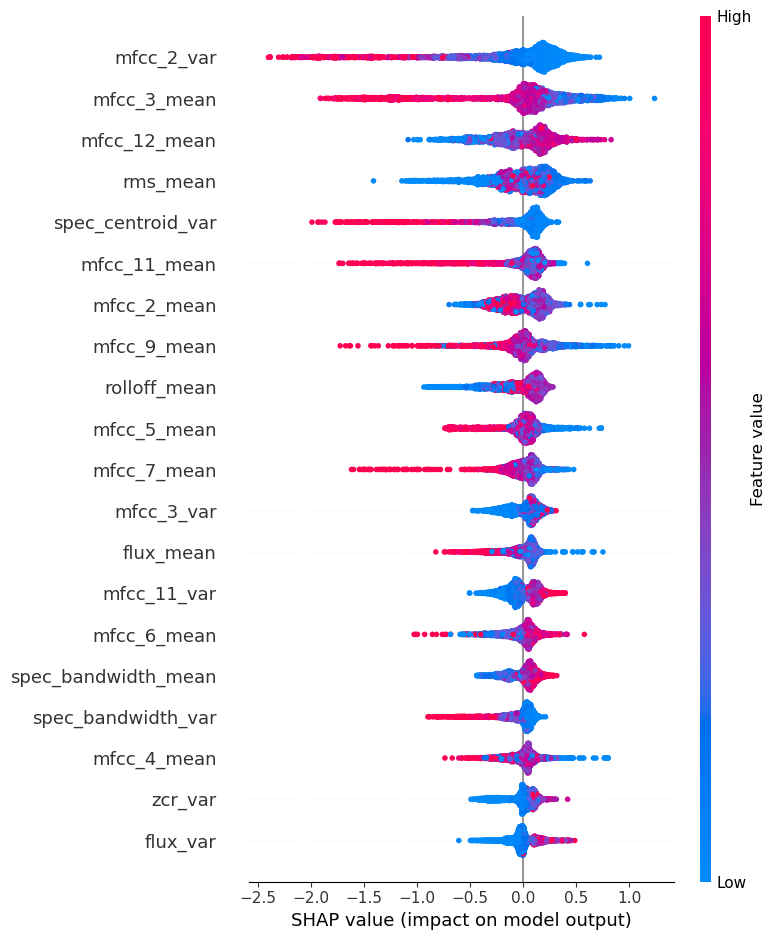

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('aves/datos_futures_BASE.csv')

df_final['is_ave'] = df_final['is_ave'].astype(bool).astype(int)
X = df_final.drop(columns=['is_ave'])
y = df_final['is_ave']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  # type: ignore

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal) # type: ignore
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,                 
        min_samples_leaf=5,          
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.5,               # L1 regularización
        reg_lambda=1.0,              # L2 regularización
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l2',                # L2 regularización (ridge)
        C=0.5,                       # menor C => más regularización
        solver='liblinear',
        max_iter=1000,
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=0.5,                       # menor C => más margen, menos sobreajuste
        probability=True,
        random_state=42
    )
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]
        
    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]
        
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

# Diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Para Random Forest
importances_rf = models['Random Forest'].feature_importances_
# Para XGBoost
importances_xgb = models['XGBoost'].feature_importances_

# Explicador de SHAP para XGBoost
explainer = shap.Explainer(models['XGBoost'])
shap_values = explainer(X_test)

# Gráfico de resumen de importancia global
shap.summary_plot(shap_values, X_test)

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.7626  0.9122    0.8307  0.9125
1              XGBoost     0.8370  0.9020    0.8683  0.9444
2  Logistic Regression     0.6449  0.7522    0.6944  0.7706
3                  SVM     0.7969  0.8769    0.8350  0.9112


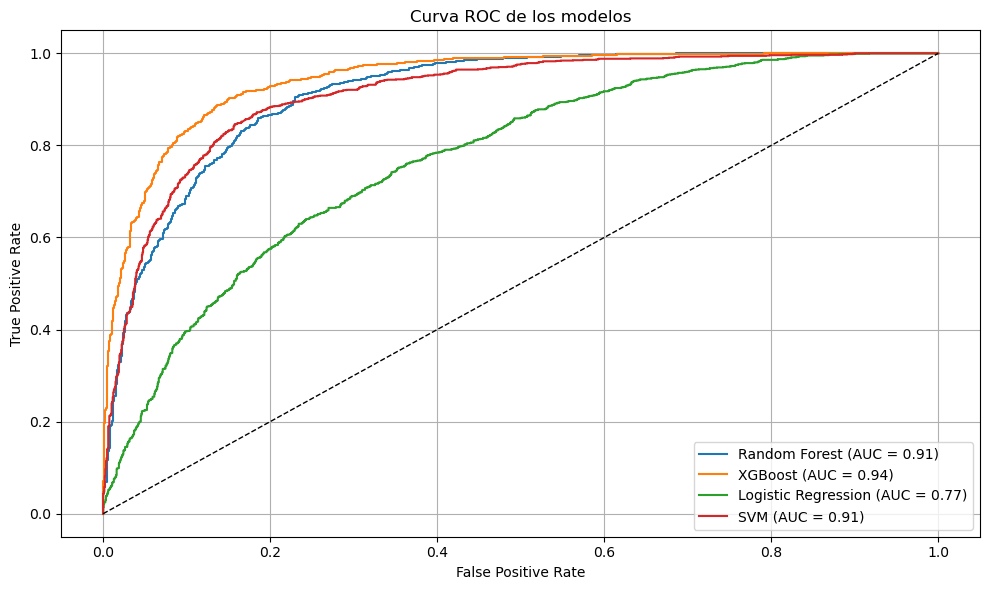

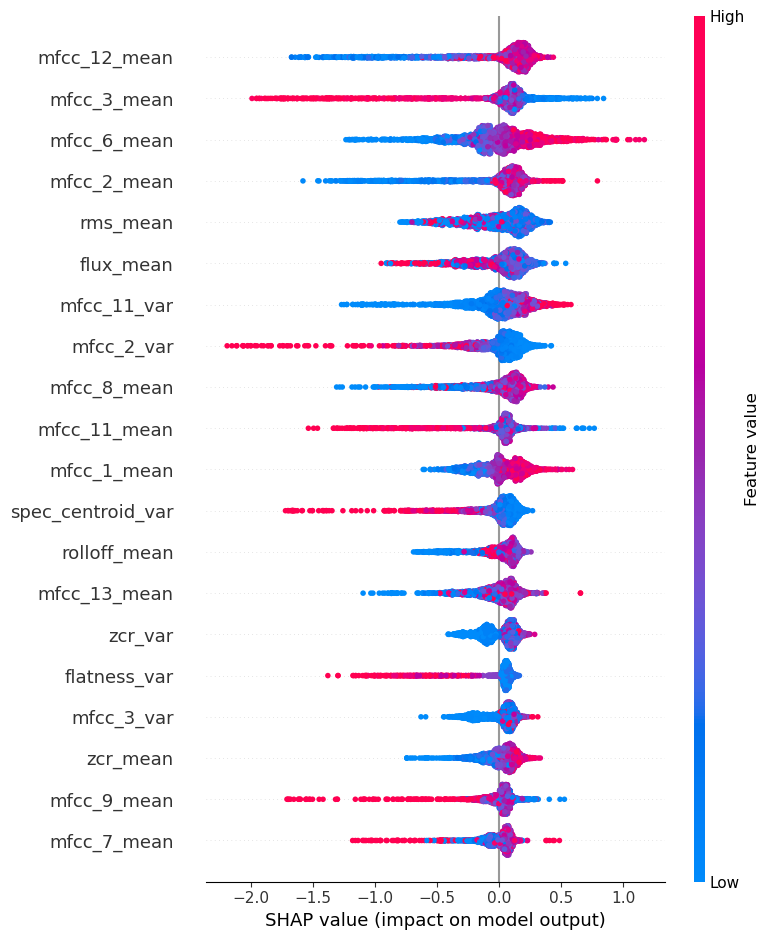

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('datos_futures_M1.csv')

df_final['is_ave'] = df_final['is_ave'].astype(bool).astype(int)
X = df_final.drop(columns=['is_ave'])
y = df_final['is_ave']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  # type: ignore

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal) # type: ignore
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,                 
        min_samples_leaf=5,          
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.5,               # L1 regularización
        reg_lambda=1.0,              # L2 regularización
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l2',                # L2 regularización (ridge)
        C=0.5,                       # menor C => más regularización
        solver='liblinear',
        max_iter=1000,
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=0.5,                       # menor C => más margen, menos sobreajuste
        probability=True,
        random_state=42
    )
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]
        
    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]
        
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

# Diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Para Random Forest
importances_rf = models['Random Forest'].feature_importances_
# Para XGBoost
importances_xgb = models['XGBoost'].feature_importances_

# Explicador de SHAP para XGBoost
explainer = shap.Explainer(models['XGBoost'])
shap_values = explainer(X_test)

# Gráfico de resumen de importancia global
shap.summary_plot(shap_values, X_test)

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.7725  0.9172    0.8387  0.9158
1              XGBoost     0.8670  0.9284    0.8967  0.9583
2  Logistic Regression     0.6744  0.7558    0.7128  0.7668
3                  SVM     0.8087  0.8680    0.8373  0.9116


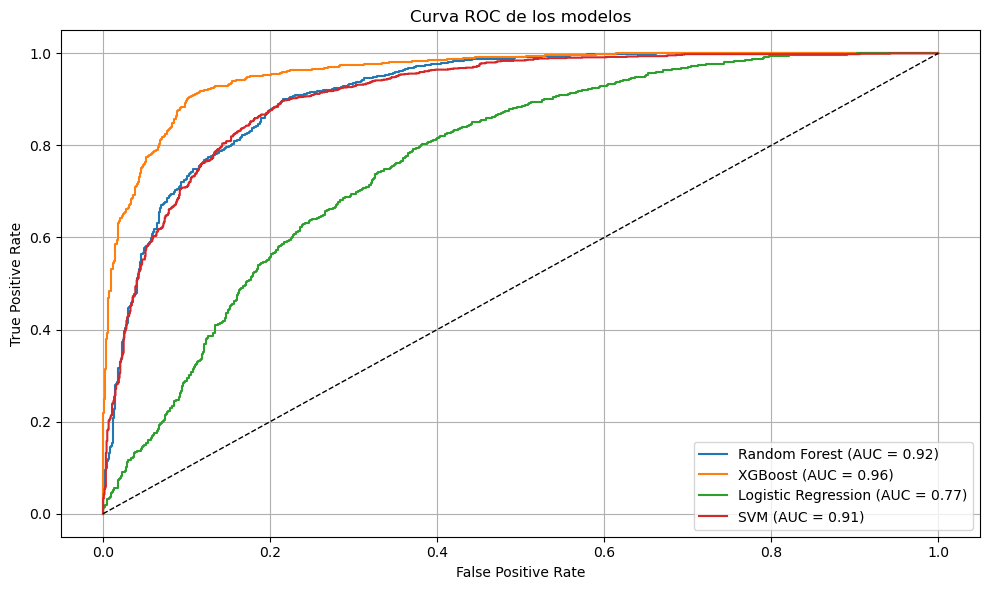

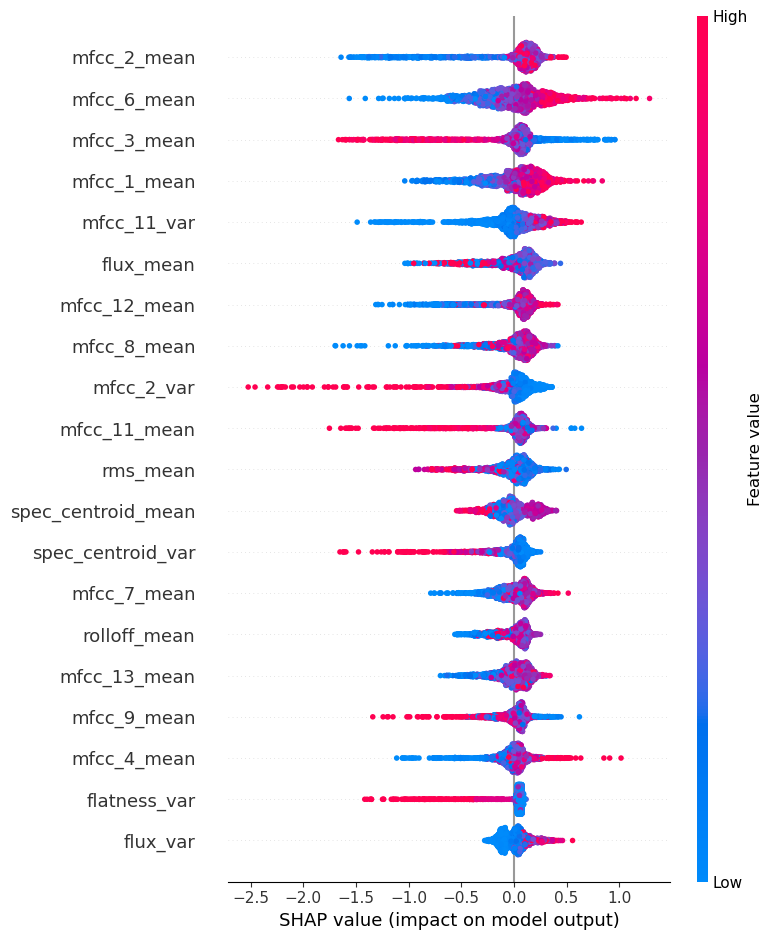

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('datos_futures_M2.csv')

df_final['is_ave'] = df_final['is_ave'].astype(bool).astype(int)
X = df_final.drop(columns=['is_ave'])
y = df_final['is_ave']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  # type: ignore

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal) # type: ignore
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,                 
        min_samples_leaf=5,          
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.5,               # L1 regularización
        reg_lambda=1.0,              # L2 regularización
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l2',                # L2 regularización (ridge)
        C=0.5,                       # menor C => más regularización
        solver='liblinear',
        max_iter=1000,
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=0.5,                       # menor C => más margen, menos sobreajuste
        probability=True,
        random_state=42
    )
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]
        
    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]
        
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

# Diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Para Random Forest
importances_rf = models['Random Forest'].feature_importances_
# Para XGBoost
importances_xgb = models['XGBoost'].feature_importances_

# Explicador de SHAP para XGBoost
explainer = shap.Explainer(models['XGBoost'])
shap_values = explainer(X_test)

# Gráfico de resumen de importancia global
shap.summary_plot(shap_values, X_test)